# <center><bold> Modelo de clasificación para la predecir ataques al corazón</bold></center>

### Un ataque al corazón, en concreto, un infarto agudo al miocardio, se produce debido a un coágulo de sangre que se forma en las vías de irrigación sanguínea hacia el corazón. Una situación crítica que puede llegar a ser mortal, ya que sin la cantidad suficiente de sangre, los tejidos no reciben el oxígeno necesario y comienzan a dañarse. 
 
### Algunos de los síntomas de un ataque cardiaco son dolor en el pecho y en la parte superior del cuerpo, hay también falta de aire, mareos, sudoración y nauseas. Es crucial actuar con rapidez, porque mientras mas tiempo pase sin que el corazón reciba el oxígeno suficiente, más daño sufrirán los músculos involucrados en el sistema circulatorio. Un ataque cardiaco puede provocar un paro cardiacó súbito.

### El conjunto de datos que se presenta a continuación se compone de 303 registros con 14 variables que describen factores que pueden llegar a ser altamente influyentes en la predicción de un ataque cardiaco, y son los siguientes:

- age - Edad del paciente
- sex - Sexo del paciente (1 = Male, 0 = Female)
- cp - Tipo de dolor en el pecho (0 = Angina típica, 1 = Angina atípica, 2 = Dolor no anginoso, 3 = Asintomático)
- trtbps - Presión arterial en reposo (en mm Hg)
- chol - Colesterol en mg/dl obtenido a través del sensor BMI
- fbs - (glucemia en ayunas > 120 mg/dl) (1 = Verdadero, 0 = Falso)
- restecg - Resultados electrocardiográficos en reposo (0 = Normal, 1 = Normalidad de onda ST-T, 2 = Hipertrófia del ventrículo izquierdo)
- thalachh - Frecuencia cardíaca máxima alcanzada
- oldpeak - Pico anterior de frecuencia
- slp - Pendiente de la máxima
- caa - Número de vasos principales
- thall - Resultado de la prueba de esfuerzo con talio (de 0 a 3)
- exng - Angina inducida por el ejercicio (1 = Si, 0 = No)
- output - Variable de salida (1=SI, 0=NO)

In [1]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

/home/yerko/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip3 install html5lib

In [3]:
# Load Data

df = pd.read_csv('heart.csv')

df.head(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data exploration 

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking the number of unique values
dict = {}

for i in df.columns:
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index=["unique"]).transpose()

,unique
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [8]:
# Separating the columns in categorical and continuous

cat_cols = ["sex", "exng", "caa", "cp", "fbs", "restecg", "slp", 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
target_col = ["output"]

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
df[con_cols].describe().T.sort_values(by='std', ascending=False)\
                    .style.background_gradient(cmap='GnBu')\
                    .bar(subset=["max"], color='#BB0000')\
                    .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


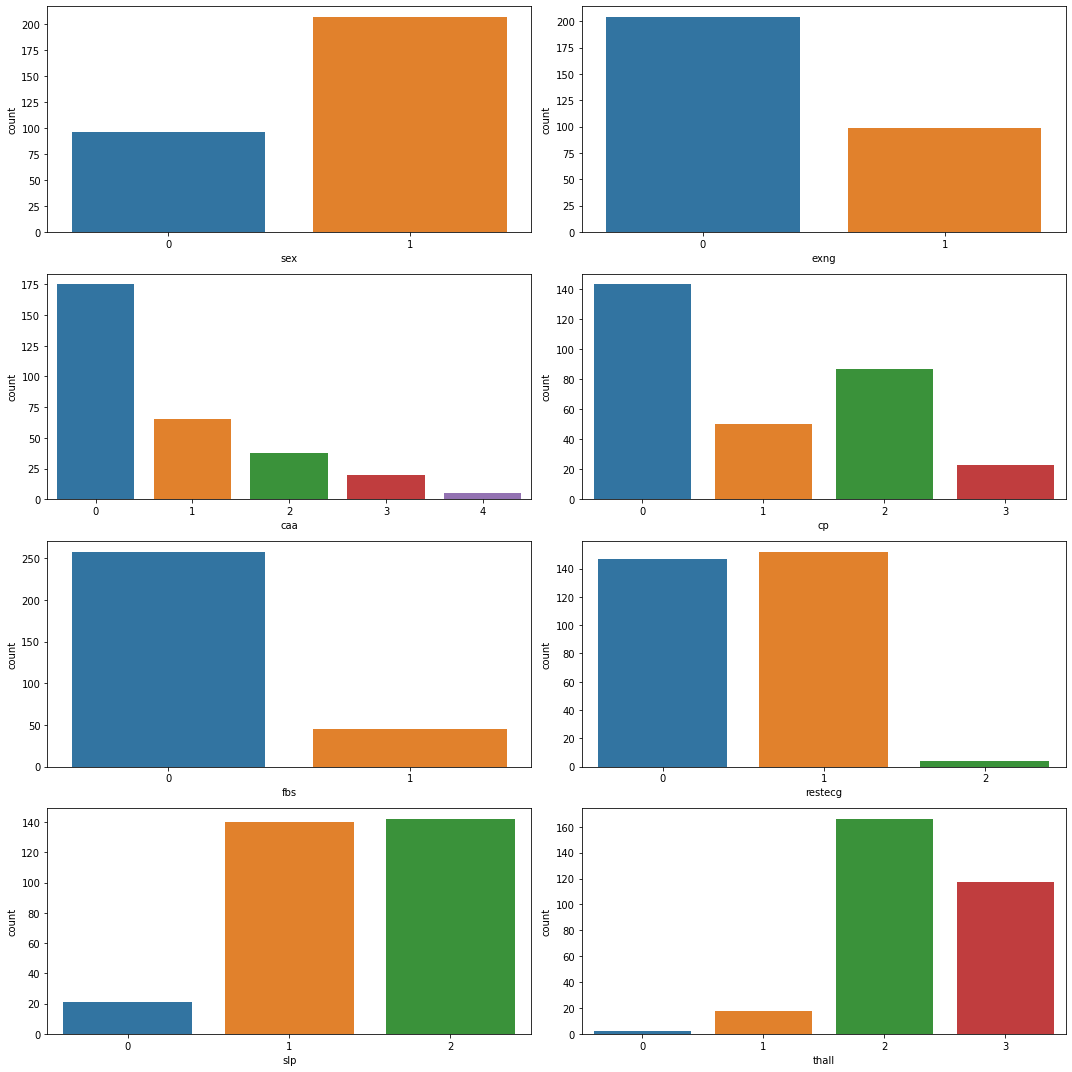

In [10]:
# Count plot of categorical variable
fig = plt.figure(figsize=(15,15))
for i in range(len(cat_cols)):
    plt.subplot(4,2, i+1)
    sns.countplot(x=df[cat_cols[i]])
    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

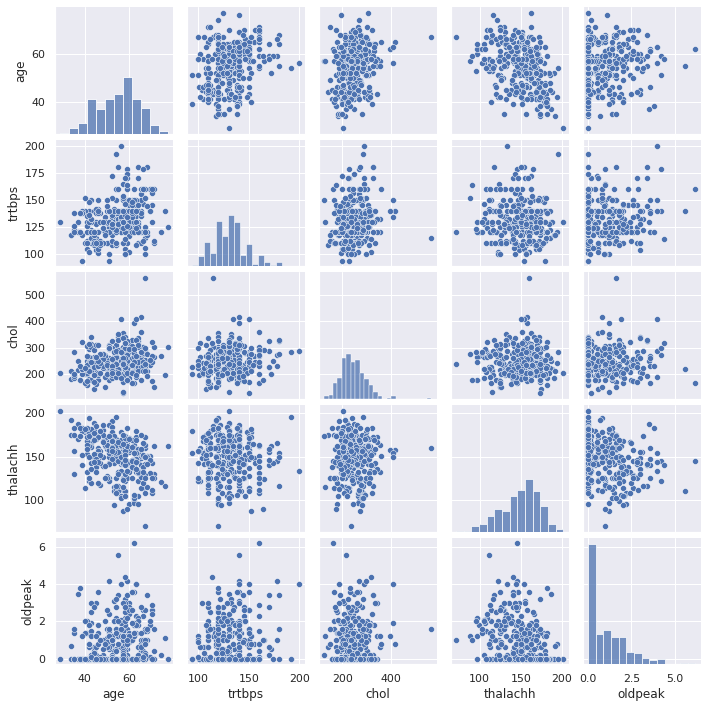

In [11]:
# Relationship between continuous variables

sns.set()
cols = df[con_cols]
sns.pairplot(df[con_cols], height = 2)
plt.show

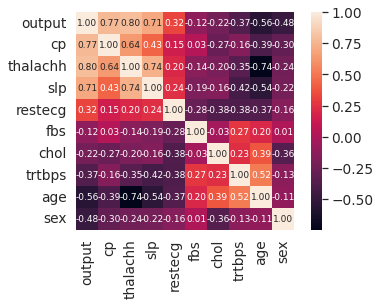

In [12]:
# Correlation matrix

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

corrmat = pd.DataFrame(scaled, columns = df.columns).corr()

k = 10
cols = corrmat.nlargest(k, 'output')['output'].index
cm = np.corrcoef(corrmat[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### 'cp', 'thalachh' and 'slp' have a highly correlation with 'output' 

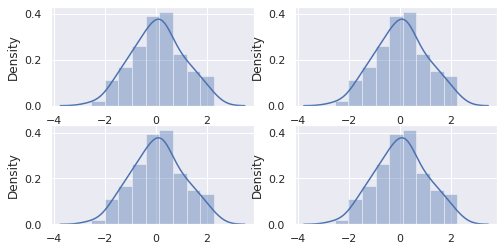

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)

for i in range(4):
    subplot(2,2,i+1)
    ax = sns.distplot(x)
    
plt.show()

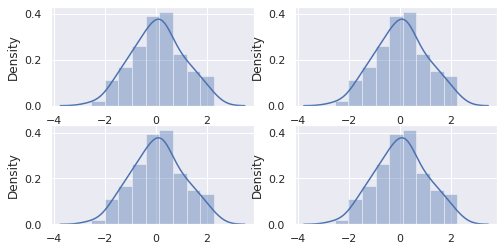

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)

for i in range(4):
    subplot(2,2, i+1)
    ax = sns.distplot(x)
    
plt.show()

In [15]:
dfm = df.melt(id_vars=cat_cols, var_name='Distribution')
display(dfm.head(3))

,sex,exng,caa,cp,fbs,restecg,slp,thall,Distribution,value
0,1,0,0,3,1,0,0,1,age,63.0
1,1,0,0,2,0,1,0,2,age,37.0
2,0,0,0,1,0,0,2,2,age,41.0


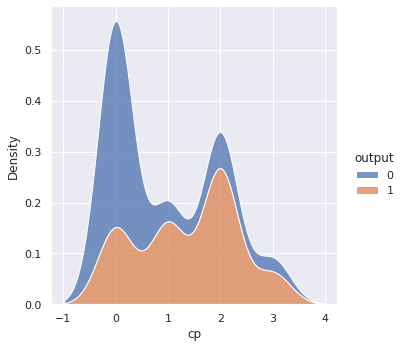

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

sns.set(rc={"figure.figsize": (18, 12)}); 

#cat_cols = ['cp']
   
sns.displot(df, x='cp', hue="output", kind="kde", multiple="stack")


plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'hist'

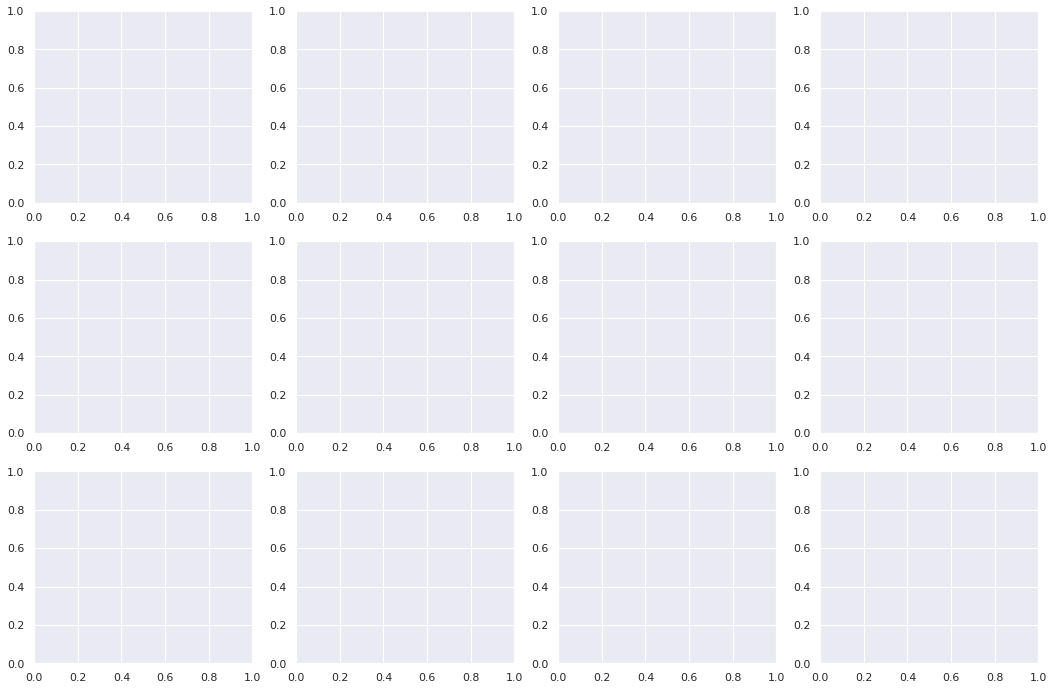

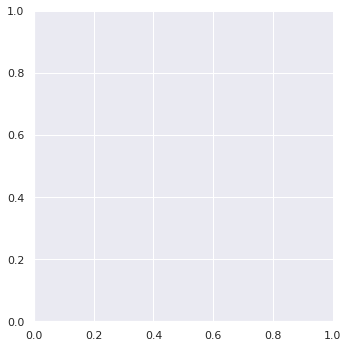

In [17]:
fig, axes = plt.subplots(ncols=4, nrows=3)

cat_cols = ['caa', 'cp']
for i, ax in zip(range(2), axes.flat):
    sns.displot(df, x=cat_cols[i], hist=False, ax=ax)
    

In [ ]:
sns.displot(df, x='cp', hue="output", kind="kde", multiple="stack")

In [ ]:
fig = plt.figure(figsize=(15,15))

cat_cols = ['caa', 'cp']
for i in range(len(cat_cols)):
    plt.subplot(1,2,i+1)
    #sns.histplot(data=df, x=cat_cols[i], kde=True, hue="output")
    sns.displot(df, x=cat_cols[i], hue="output", kind="kde", multiple="stack")
    
plt.tight_layout()
plt.show()